# Лабораторная работа 3: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет** в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание



1. Установите QP-солвер, разберитесь с его интерфейсом.

In [1]:
#!pip install cvxopt
import cvxopt
import cvxopt.solvers
import numpy as np


2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$

In [2]:
P = cvxopt.matrix([[2, 0], [0, 8]],tc='d')
q = cvxopt.matrix([-8, -16],tc='d')
G = cvxopt.matrix([[-1,0],[1,0],[0,-1],[1,1]],tc='d').T
h = cvxopt.matrix(np.array([0, 3, 0, 5]),tc='d')
#print(P, q, G, h)

In [3]:
solve = cvxopt.solvers.qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  1e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  2e-16  5e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  3e-17
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  4e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.


In [4]:
print(solve['x'])
print(solve['primal objective'])

[ 3.00e+00]
[ 2.00e+00]

-30.99999280553902



3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [5]:
P = cvxopt.matrix([[2, 0], [0, 8]],tc='d')
q = cvxopt.matrix([-8, -16],tc='d')
G = cvxopt.matrix([[1,0],[0,-1],[1,1]],tc='d').T
h = cvxopt.matrix(np.array([ 3, 0, 5]),tc='d')

solve = cvxopt.solvers.qp(P, q, G, h)
print(solve['x'])
print(solve['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.1547e+01 -3.0486e+01  1e+01  5e-01  3e-01
 1: -3.0164e+01 -3.1582e+01  1e+00  4e-17  1e-17
 2: -3.0958e+01 -3.1037e+01  8e-02  2e-16  7e-17
 3: -3.0994e+01 -3.1006e+01  1e-02  2e-16  2e-17
 4: -3.0999e+01 -3.1001e+01  2e-03  0e+00  4e-17
 5: -3.1000e+01 -3.1000e+01  2e-04  2e-16  6e-17
 6: -3.1000e+01 -3.1000e+01  3e-05  0e+00  3e-17
 7: -3.1000e+01 -3.1000e+01  4e-06  8e-17  4e-17
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.99999778449002


In [6]:
P = cvxopt.matrix([[2, 0], [0, 8]],tc='d')
q = cvxopt.matrix([-8, -16],tc='d')
G = cvxopt.matrix([[-1,0],[0,-1],[1,1]],tc='d').T
h = cvxopt.matrix(np.array([0, 0, 5]),tc='d')

solve = cvxopt.solvers.qp(P, q, G, h)
print(solve['x'])
print(solve['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0419e+01 -3.8120e+01  8e+00  0e+00  2e-16
 1: -3.1027e+01 -3.1339e+01  3e-01  2e-16  4e-17
 2: -3.1196e+01 -3.1201e+01  6e-03  2e-16  2e-17
 3: -3.1200e+01 -3.1200e+01  6e-05  1e-16  4e-17
 4: -3.1200e+01 -3.1200e+01  6e-07  1e-16  4e-17
Optimal solution found.
[ 3.20e+00]
[ 1.80e+00]

-31.199999566149053


In [7]:
P = cvxopt.matrix([[2, 0], [0, 8]],tc='d')
q = cvxopt.matrix([-8, -16],tc='d')
G = cvxopt.matrix([[-1,0],[1,0],[1,1]],tc='d').T
h = cvxopt.matrix(np.array([0, 3, 5]),tc='d')

solve = cvxopt.solvers.qp(P, q, G, h)
print(solve['x'])
print(solve['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0547e+01 -3.4734e+01  4e+00  0e+00  3e-01
 1: -3.0841e+01 -3.1065e+01  2e-01  2e-16  7e-03
 2: -3.0992e+01 -3.1009e+01  2e-02  8e-17  4e-04
 3: -3.0999e+01 -3.1001e+01  2e-03  2e-16  4e-17
 4: -3.1000e+01 -3.1000e+01  3e-04  0e+00  2e-17
 5: -3.1000e+01 -3.1000e+01  4e-05  0e+00  3e-17
 6: -3.1000e+01 -3.1000e+01  6e-06  8e-17  6e-17
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.99999695228387


In [8]:
P = cvxopt.matrix([[2, 0], [0, 8]],tc='d')
q = cvxopt.matrix([-8, -16],tc='d')
G = cvxopt.matrix([[-1,0],[1,0],[0,-1]],tc='d').T
h = cvxopt.matrix(np.array([0, 3, 0]),tc='d')

solve = cvxopt.solvers.qp(P, q, G, h)
print(solve['x'])
print(solve['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0240e+01 -3.7371e+01  7e+00  0e+00  2e-01
 1: -3.0901e+01 -3.1124e+01  2e-01  1e-16  5e-03
 2: -3.0999e+01 -3.1001e+01  3e-03  7e-17  6e-05
 3: -3.1000e+01 -3.1000e+01  3e-05  0e+00  6e-07
 4: -3.1000e+01 -3.1000e+01  3e-07  2e-16  6e-09
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.999999858273384


**Выбросить можно 1,3,4 условия**

## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  

1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.


In [9]:
#!pip install cvxpy 
from sklearn.datasets import make_classification, make_moons, make_circles 
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.preprocessing import PolynomialFeatures

In [10]:
class SVM(BaseEstimator):
    def __init__(self, regularization=1, data_transform=None):
        self.regularization = regularization
        self.data_transform = data_transform
        
    def fit(self, features, labels):
        if self.data_transform:
            features = self.data_transform(features.copy())
        
        num_samples, num_features = features.shape
        identity_matrix = np.eye(num_features)
        P = np.zeros((num_samples + 1 + num_features, num_samples + 1 + num_features))
        P[:num_features, :num_features] = identity_matrix
        q = np.hstack(([0.] * (num_features + 1), [self.regularization] * num_samples))
        
        y_reshaped = labels.reshape(num_samples, 1)
        G1 = np.hstack((-y_reshaped * features, -y_reshaped, -np.eye(num_samples)))
        G2 = np.hstack((np.zeros((num_samples, num_features + 1)), -np.eye(num_samples)))
        G = np.vstack((G1, G2))
        h = np.hstack(([-1.] * num_samples, [0.] * num_samples))
        
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q), cvxopt.matrix(G), cvxopt.matrix(h))
        self.weights = np.array(solution['x'][:num_features]).flatten()
        self.bias = float(np.array(solution['x'][num_features:num_features + 1]))
        self.ksi_values = np.array(solution['x'][num_features + 1:]).flatten()
        
        self.support_vectors = list()
        self.support_vectors_class = list()
        for i in range(num_samples):
            if (np.absolute(labels[i] * (self.weights.T.dot(features[i]) + self.bias) - 1) < 1e-6) or (self.ksi_values[i] > 1e-6):
                self.support_vectors.append(features[i])
                self.support_vectors_class.append(labels[i])
        self.support_vectors = np.array(self.support_vectors)
        self.support_vectors_class = np.array(self.support_vectors_class)
        
    def predict_proba(self, features):
        if self.data_transform:
            features = self.data_transform(features.copy())
        return (np.dot(features, self.weights) + self.bias).flatten()
            
    def predict(self, features):
        if self.data_transform:
            features = self.data_transform(features.copy())
        return np.sign(self.predict_proba(features))


In [11]:
def image_svm(X_data, y_labels, regularization_strength, i, j, data_transform=None):
    svm_model = SVM(regularization_strength, data_transform)
    svm_model.fit(X_data, y_labels)

    axes[j][i].scatter(X_data[:, 0], X_data[:, 1], s=20, c=y_labels, cmap='winter', edgecolor='green')
    axes[j][i].scatter(svm_model.support_vectors[:, 0], svm_model.support_vectors[:, 1], s=50, marker='o', 
                     c=svm_model.support_vectors_class, cmap='winter', edgecolor='green')

    x1_minimum = np.min(X_data[:, 0]) - 1
    x1_maximum = np.max(X_data[:, 0]) + 1
    x2_minimum = np.min(X_data[:, 1]) - 1
    x2_maximum = np.max(X_data[:, 1]) + 1
    
    axes[j][i].set_xlim([x1_minimum, x1_maximum])
    axes[j][i].set_ylim([x2_minimum, x2_maximum])

    x_values = np.linspace(x1_minimum, x1_maximum, 100)
    y_values = np.linspace(x2_minimum, x2_maximum, 100)
    
    xx_vals, yy_vals = np.meshgrid(x_values, y_values)
    zz_vals = np.reshape(svm_model.predict_proba(np.c_[xx_vals.ravel(), yy_vals.ravel()]), xx_vals.shape)
    
    axes[j][i].pcolormesh(xx_vals, yy_vals, zz_vals, cmap='Purples', zorder=0, shading='auto')
    axes[j][i].contour(xx_vals, yy_vals, zz_vals, colors=["k", "w", "k"], 
                     linestyles=["-", "--", "-"], levels=[-1, 0, 1])
    axes[j][i].text(x1_minimum + 0.5, x2_maximum - 0.5, ('Number of support vectors: '+str(len(svm_model.support_vectors))))


  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам


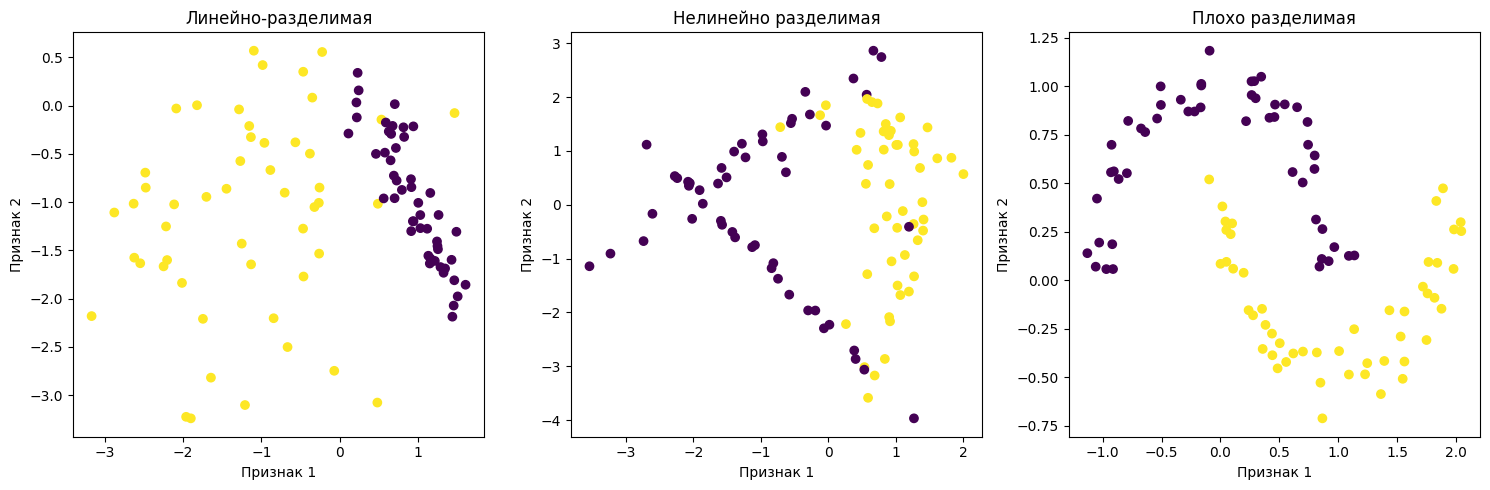

In [12]:
from sklearn.datasets import make_classification, make_moons
import numpy as np
import matplotlib.pyplot as plt

# Создание трех различных двумерных выборок для бинарной классификации
X = [[]] * 3
y = [[]] * 3

# Линейно-разделимая выборка
X[0], y[0] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=10)

# Нелинейно разделимая выборка
X[1], y[1] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=20)

# Плохо разделимая выборка
X[2], y[2] = make_moons(n_samples=100, noise=0.1, random_state=100)

X = np.array(X)
y = np.array(y)

titles = ["Линейно-разделимая", "Нелинейно разделимая", "Плохо разделимая"]


plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[i][:, 0], X[i][:, 1], c=y[i])
    plt.title(titles[i])
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.


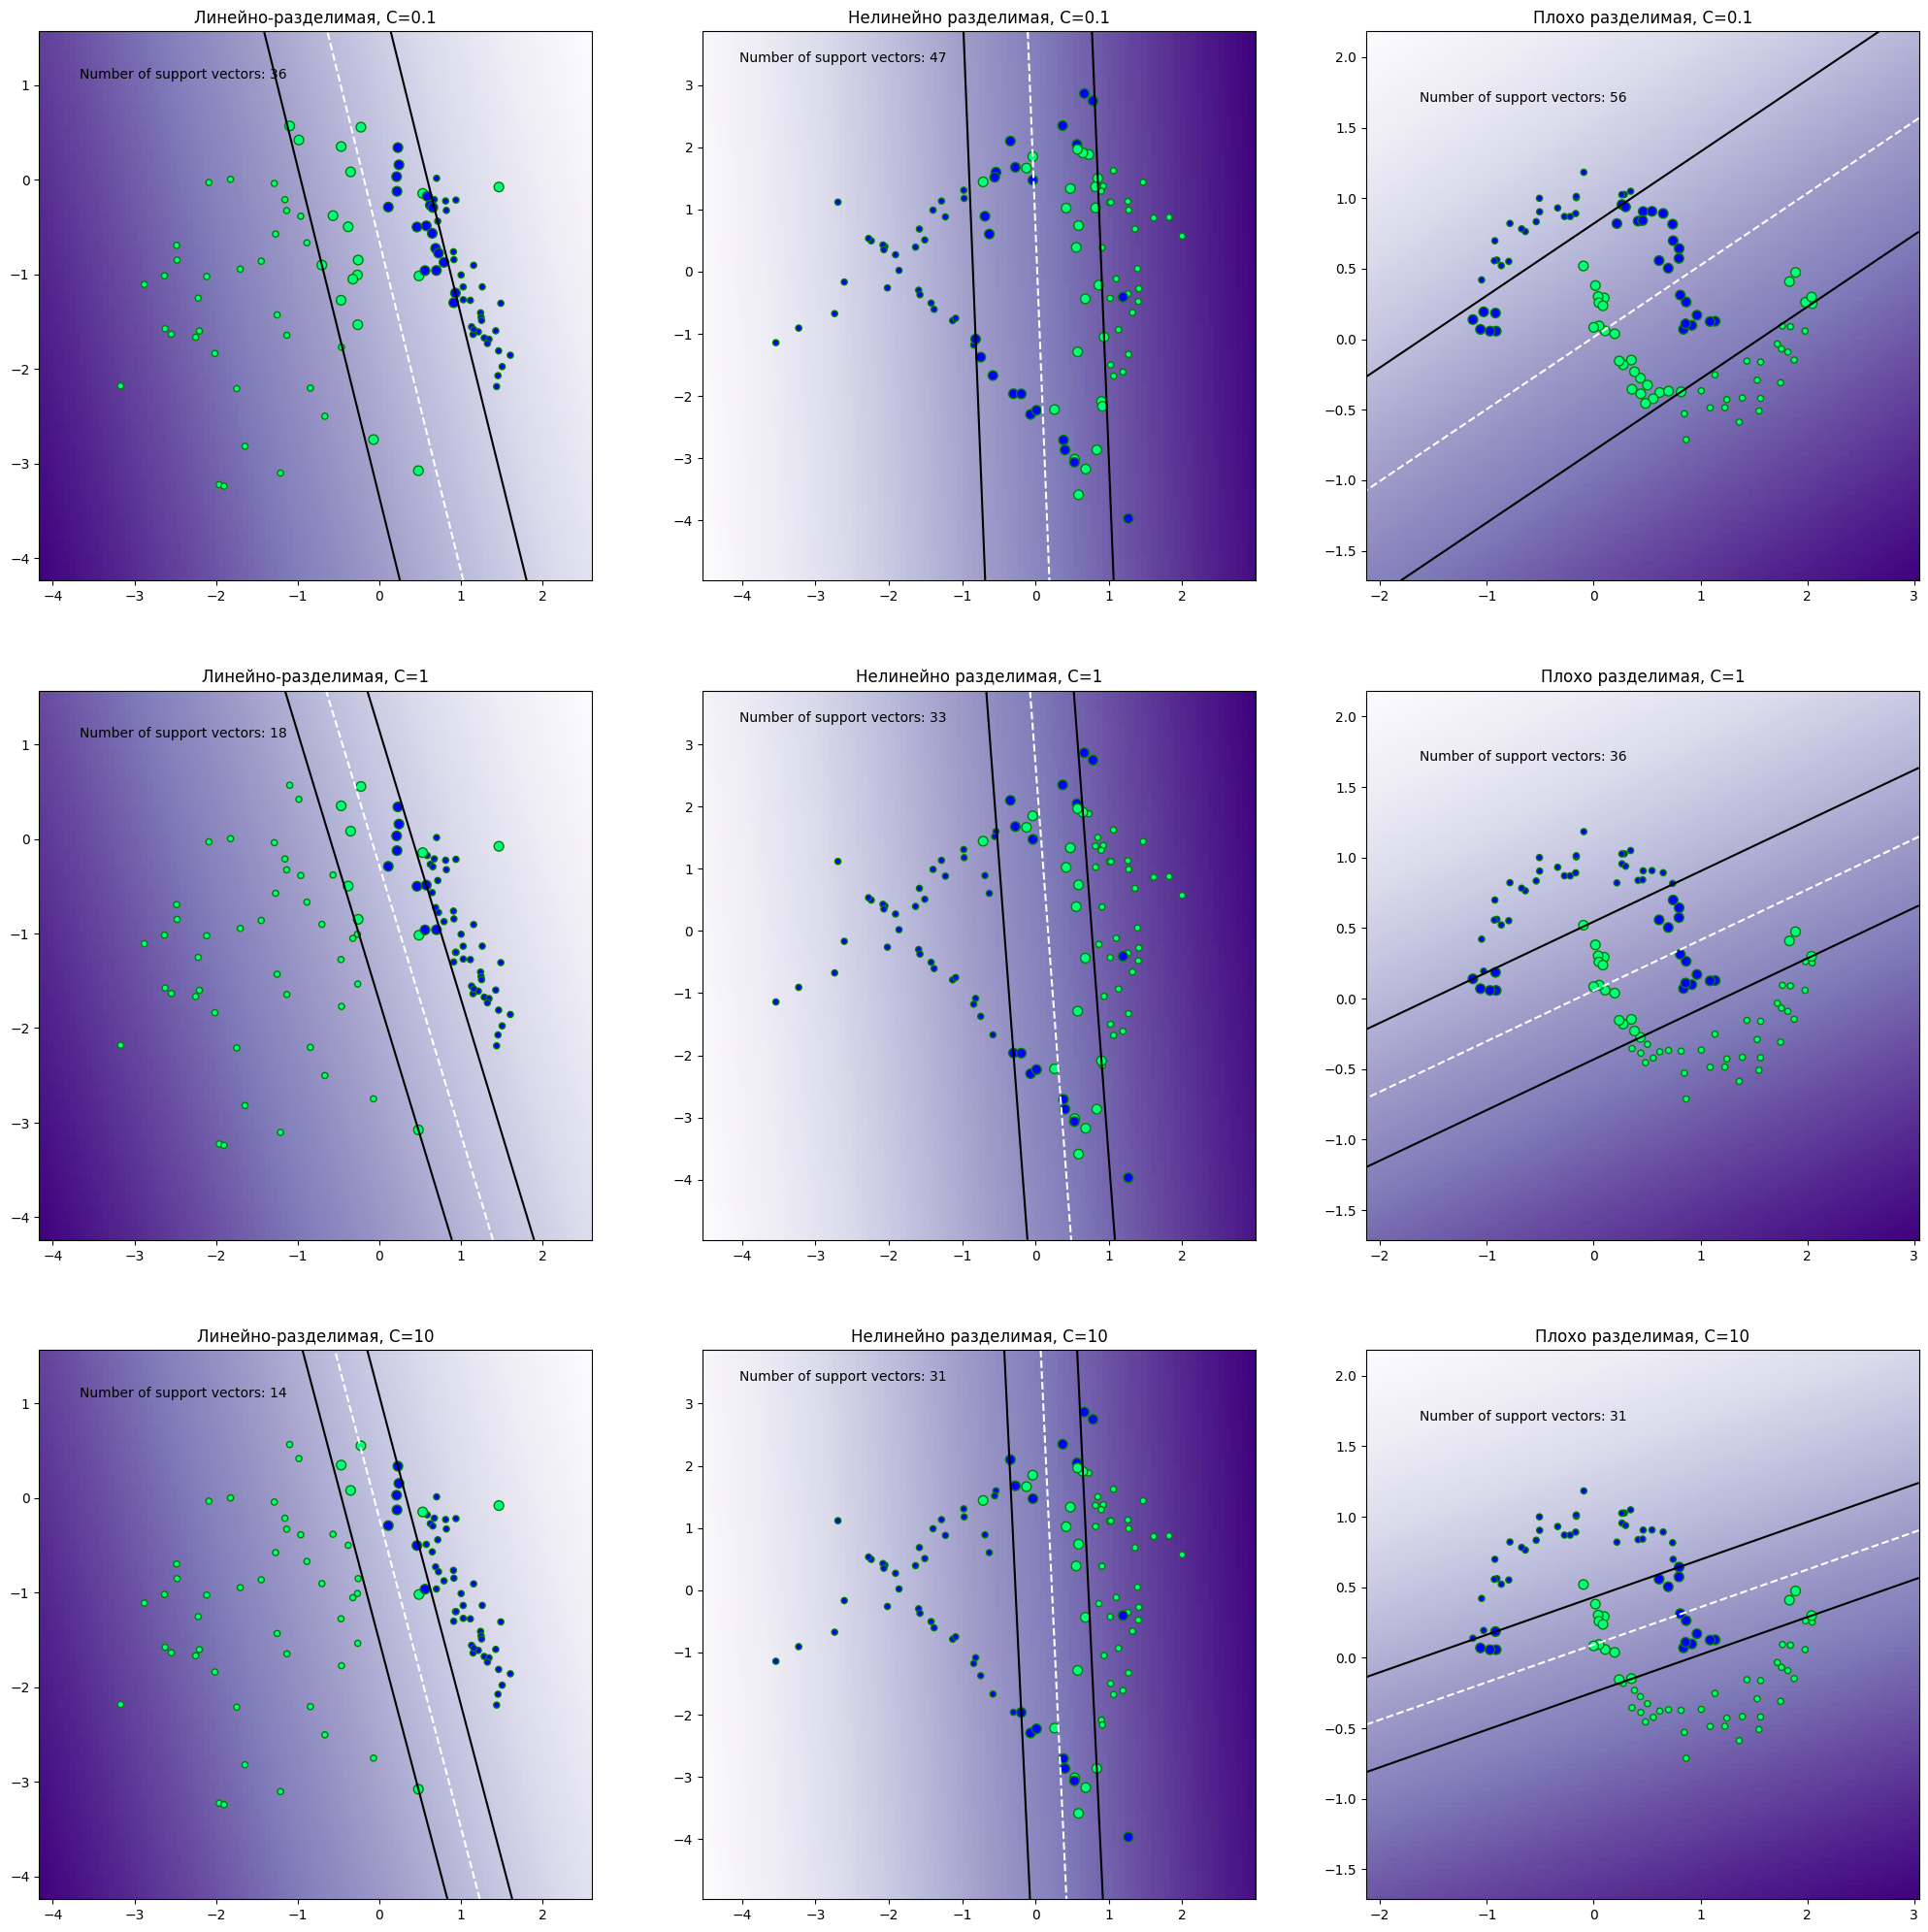

In [13]:

titles = ["Линейно-разделимая", "Нелинейно разделимая", "Плохо разделимая"]

C_values = [0.1, 1, 10] 

fig, axes = plt.subplots(len(C_values), 3, figsize=(25, 25))


for i in range(3):
    y[i][y[i] == 0] = -1
    for j in range(len(C_values)):
        image_svm(X[i], y[i], C_values[j], i, j, data_transform=None) 
        axes[j][i].set_title(titles[i] + ', C=' + str(C_values[j]))

plt.show()


  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?

In [14]:
from sklearn.svm import SVC
import numpy as np

C_values = [0.1, 1, 10, 100]

support_vectors_counts = {'Линейно-разделимая': [], 'Нелинейно разделимая': [], 'Плохо разделимая': []}

for i in range(3):
    y[i][y[i] == 0] = -1
    
    for C in C_values:
        svm_model = SVC(C=C, kernel='linear') if i == 0 else SVC(C=C, kernel='rbf')  
        
        svm_model.fit(X[i], y[i])
        
        support_vectors_counts[titles[i]].append(np.sum(svm_model.n_support_))
        
for key, value in support_vectors_counts.items():
    print(f"Выборка '{key}': {value}")


Выборка 'Линейно-разделимая': [36, 18, 14, 14]
Выборка 'Нелинейно разделимая': [76, 41, 29, 27]
Выборка 'Плохо разделимая': [77, 28, 11, 9]



  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

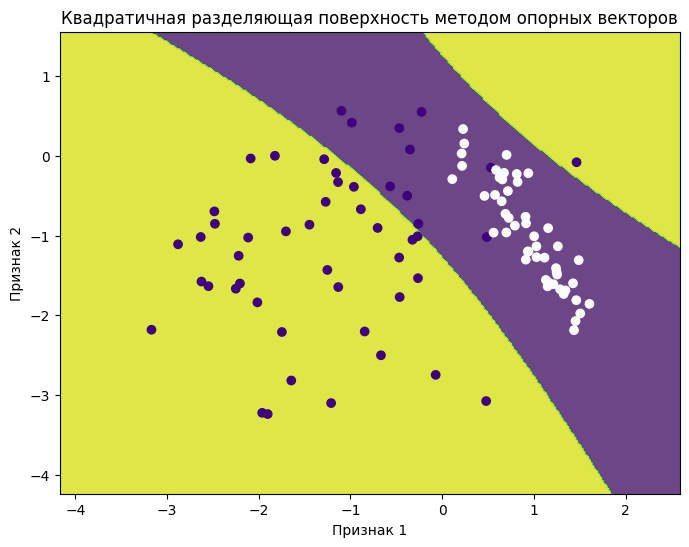

In [15]:
svm_model = SVC(kernel='poly', degree=2, C=1.0)
svm_model.fit(X[0], y[0])  

plt.figure(figsize=(8, 6))

h = 0.02
x_min, x_max = X[0][:, 0].min() - 1, X[0][:, 0].max() + 1
y_min, y_max = X[0][:, 1].min() - 1, X[0][:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

plt.scatter(X[0][:, 0], X[0][:, 1], c=y[0], cmap='Purples')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Квадратичная разделяющая поверхность методом опорных векторов')

plt.show()


# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 



#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.


In [16]:
from sklearn.datasets import make_classification, make_moons, make_circles
from matplotlib import pyplot as plt


In [17]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    
    def __init__(self, C=1, kernel="linear", power=None, gamma=None):
        self.C = C
        self.kernel = kernel
        self.power = power
        self.gamma = gamma
        
    def _linear(self, x1, x2):
        return np.dot(x1, x2)

    def _poly(self, x1, x2, power):
        return (np.dot(x1, x2) + 1) ** power 
        
    def _RBF(self, x1, x2, gamma):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)
    
    def fit(self, X, y):
        N, d = X.shape
        K = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                if self.kernel == "linear": 
                    K[i, j] = self._linear(X[i], X[j])
                elif self.kernel == "poly": 
                    K[i, j] = self._poly(X[i], X[j], self.power)
                else: 
                    K[i, j] = self._RBF(X[i], X[j], self.gamma)
                    
        P = cvxopt.matrix(np.outer(y, y) * K, tc='d')
        q = cvxopt.matrix(-np.ones(N), tc='d')
        G = cvxopt.matrix(np.vstack((np.eye(N), -np.eye(N))), tc='d')
        h = cvxopt.matrix(np.hstack((self.C * np.ones(N), np.zeros(N))), tc='d')
        A = cvxopt.matrix(y.reshape(1, N), tc='d')  
        b = cvxopt.matrix(0, tc='d')          
        cvxopt.solvers.options['show_progress'] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alpha = np.array(sol['x']).flatten()
        
        ind = self.alpha > 1e-6
        self.sup_alpha = self.alpha[ind]
        self.sup_vect = X[ind]
        self.sup_vect_class = y[ind]
        
        self.b = list()
        for i in range(len(self.sup_vect)):
            temp = 0
            for j in range(len(self.sup_vect)):
                if self.kernel == "linear": 
                    temp += self._linear(self.sup_vect[i], self.sup_vect[j])
                elif self.kernel == "poly": 
                    temp += self._poly(self.sup_vect[i], self.sup_vect[j], self.power)
                else: 
                    temp += self._RBF(self.sup_vect[i], self.sup_vect[j], self.gamma)
            self.b.append(self.sup_vect_class[i] - self.sup_alpha[i]*self.sup_vect_class[i]*temp)
        self.b = np.array(self.b).mean()
        

    def predict_proba(self, X):
        y_pred = []
        for item in X:
            prediction = 0
            for i in range(len(self.sup_alpha)):
                if self.kernel == "linear":
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._linear(self.sup_vect[i], item)
                elif self.kernel == "poly":
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._poly(self.sup_vect[i], item, self.power)
                else:
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._RBF(self.sup_vect[i], item, self.gamma)
            prediction += self.b
            y_pred.append(prediction)
        return np.array(y_pred)        
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))

In [18]:
def image_DualSVM(X, y, i, j, C=1, kernel='linear', power=None, gamma=None):
    
    model = DualSVM(C = C, kernel = kernel, power = power, gamma = gamma)
    model.fit(X, y)

    ax[j][i].scatter(X[:, 0], X[:, 1], s=20, c=y, cmap='summer', edgecolor='black')
    ax[j][i].scatter(model.sup_vect[:, 0], model.sup_vect[:, 1], s=50, marker='o', 
                     c=model.sup_vect_class, cmap='summer', edgecolor='black')

    x1_min = np.min(X[:, 0]) - 1
    x1_max = np.max(X[:, 0]) + 1
    x2_min = np.min(X[:, 1]) - 1
    x2_max = np.max(X[:, 1]) + 1
    
    ax[j][i].set_xlim([x1_min, x1_max])
    ax[j][i].set_ylim([x2_min, x2_max])

    xvals = np.linspace(x1_min, x1_max, 100)
    yvals = np.linspace(x2_min, x2_max, 100)

    xx, yy = np.meshgrid(xvals, yvals)
    zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
    
    ax[j][i].pcolormesh(xx, yy, zz, cmap='Purples', zorder=0, shading='auto')
    ax[j][i].contour(xx, yy, zz, colors=["r", "b", "r"], linestyles=["-", "--", ":"], levels=[-1, 0, 1])

  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$


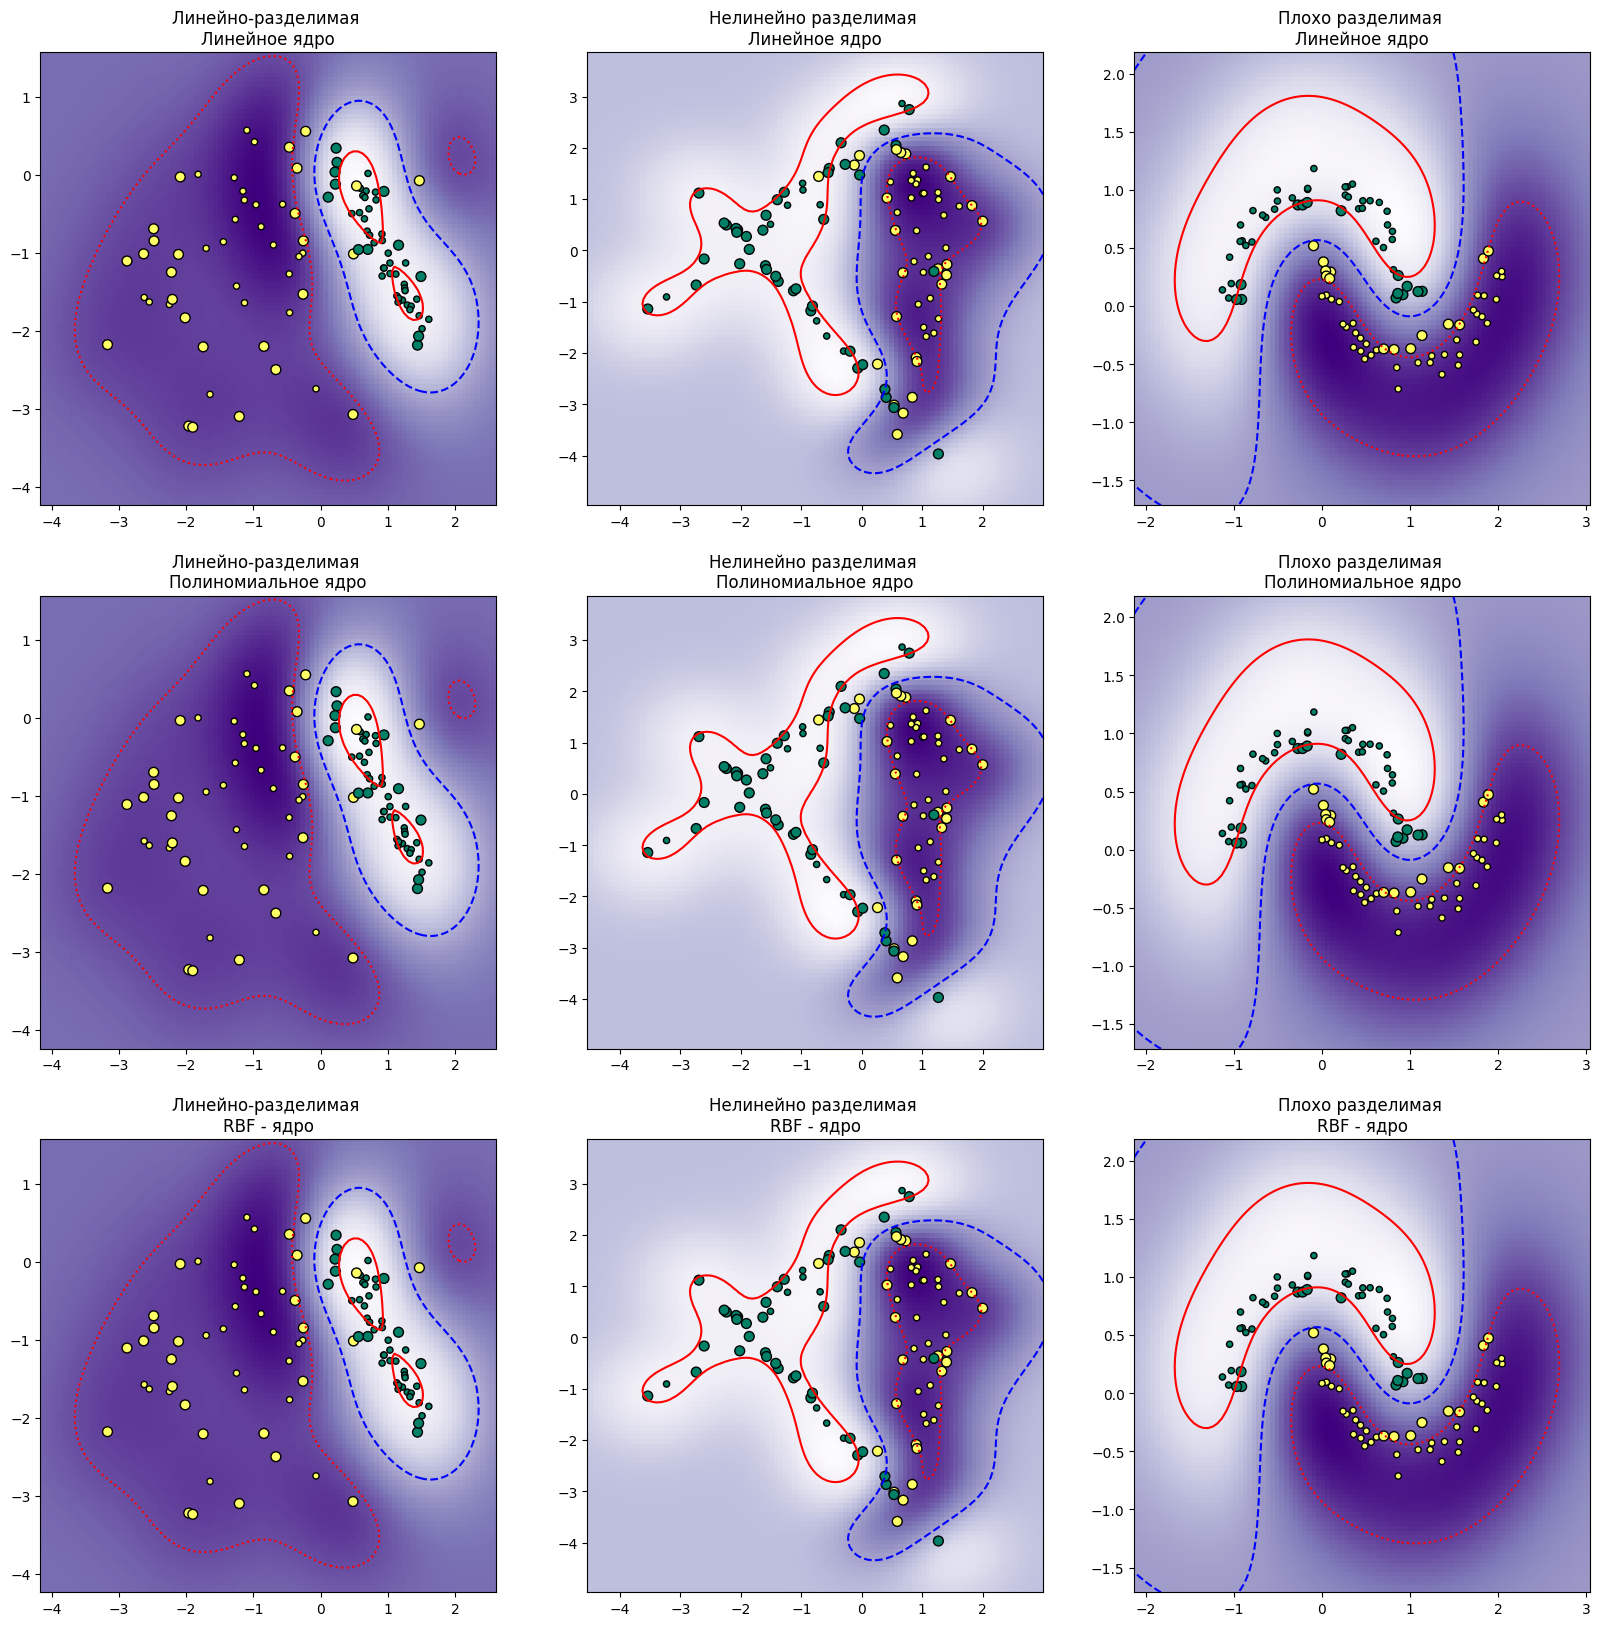

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
kernels = ['\nЛинейное', '\nПолиномиальное', '\nRBF -']
for i in range(3):
    for j in range(3):
        image_DualSVM(X[i], y[i], i, j, kernel = kernels[j], power = 2, gamma = 1)
        ax[j][i].set_title(titles[i]+' '+kernels[j]+' ядро')

  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?


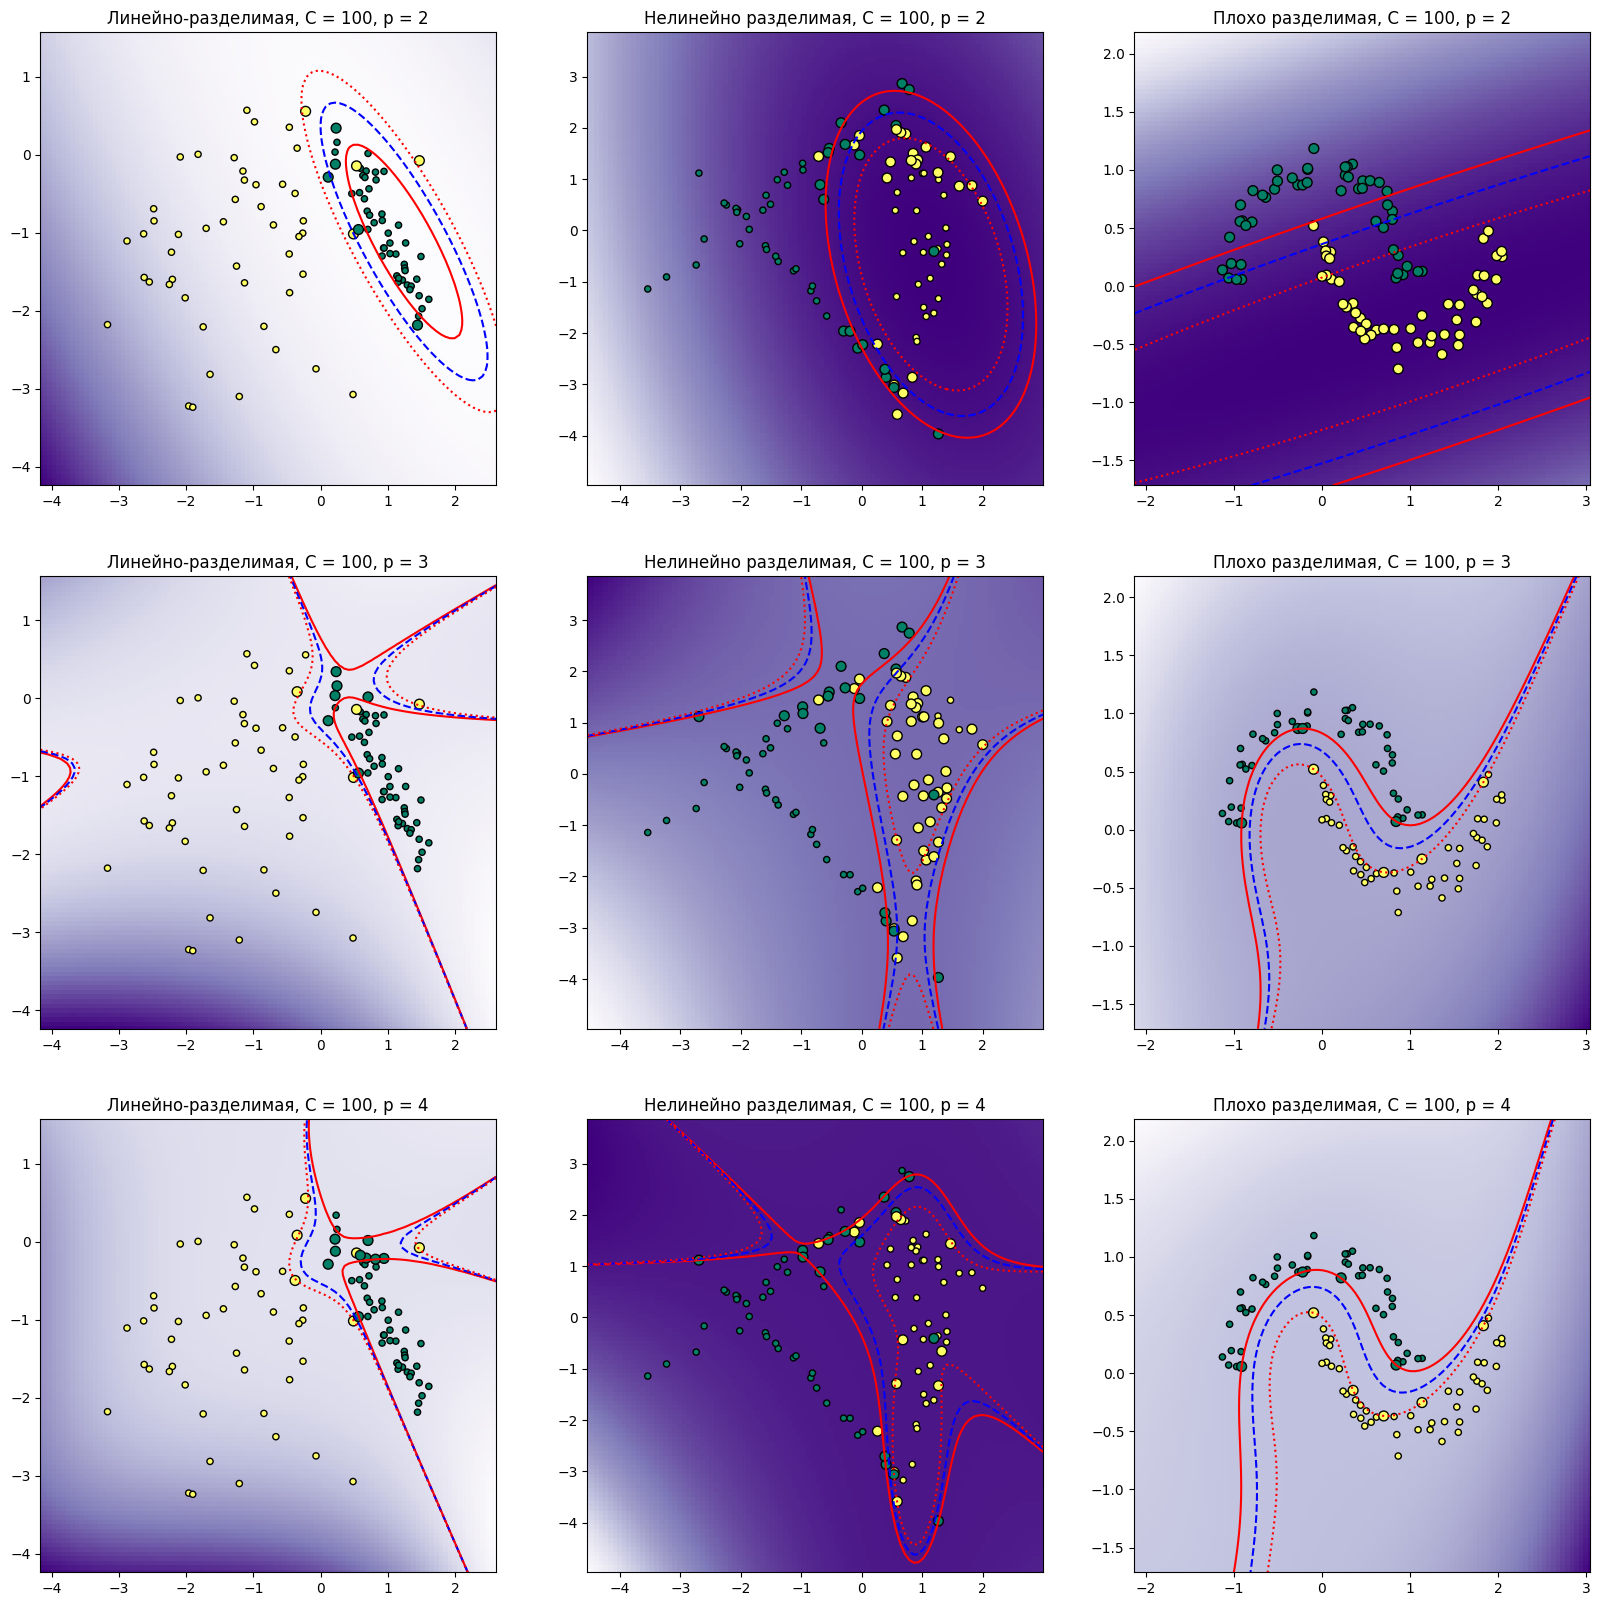

In [20]:
powers = np.arange(2,5)
cvals, pvals = np.meshgrid(C, powers)
pp = pvals.flatten()
cc = cvals.flatten()
fig, ax = plt.subplots(len(pp), 3, figsize=(20,20))
for i in range(3):
    for j in range(len(pp)):
        image_DualSVM(X[i], y[i], i, j, cc[j], 'poly', pp[j])
        ax[j][i].set_title(titles[i] + ', C = ' + str(cc[j]) + ', p = ' + str(pp[j]))

  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

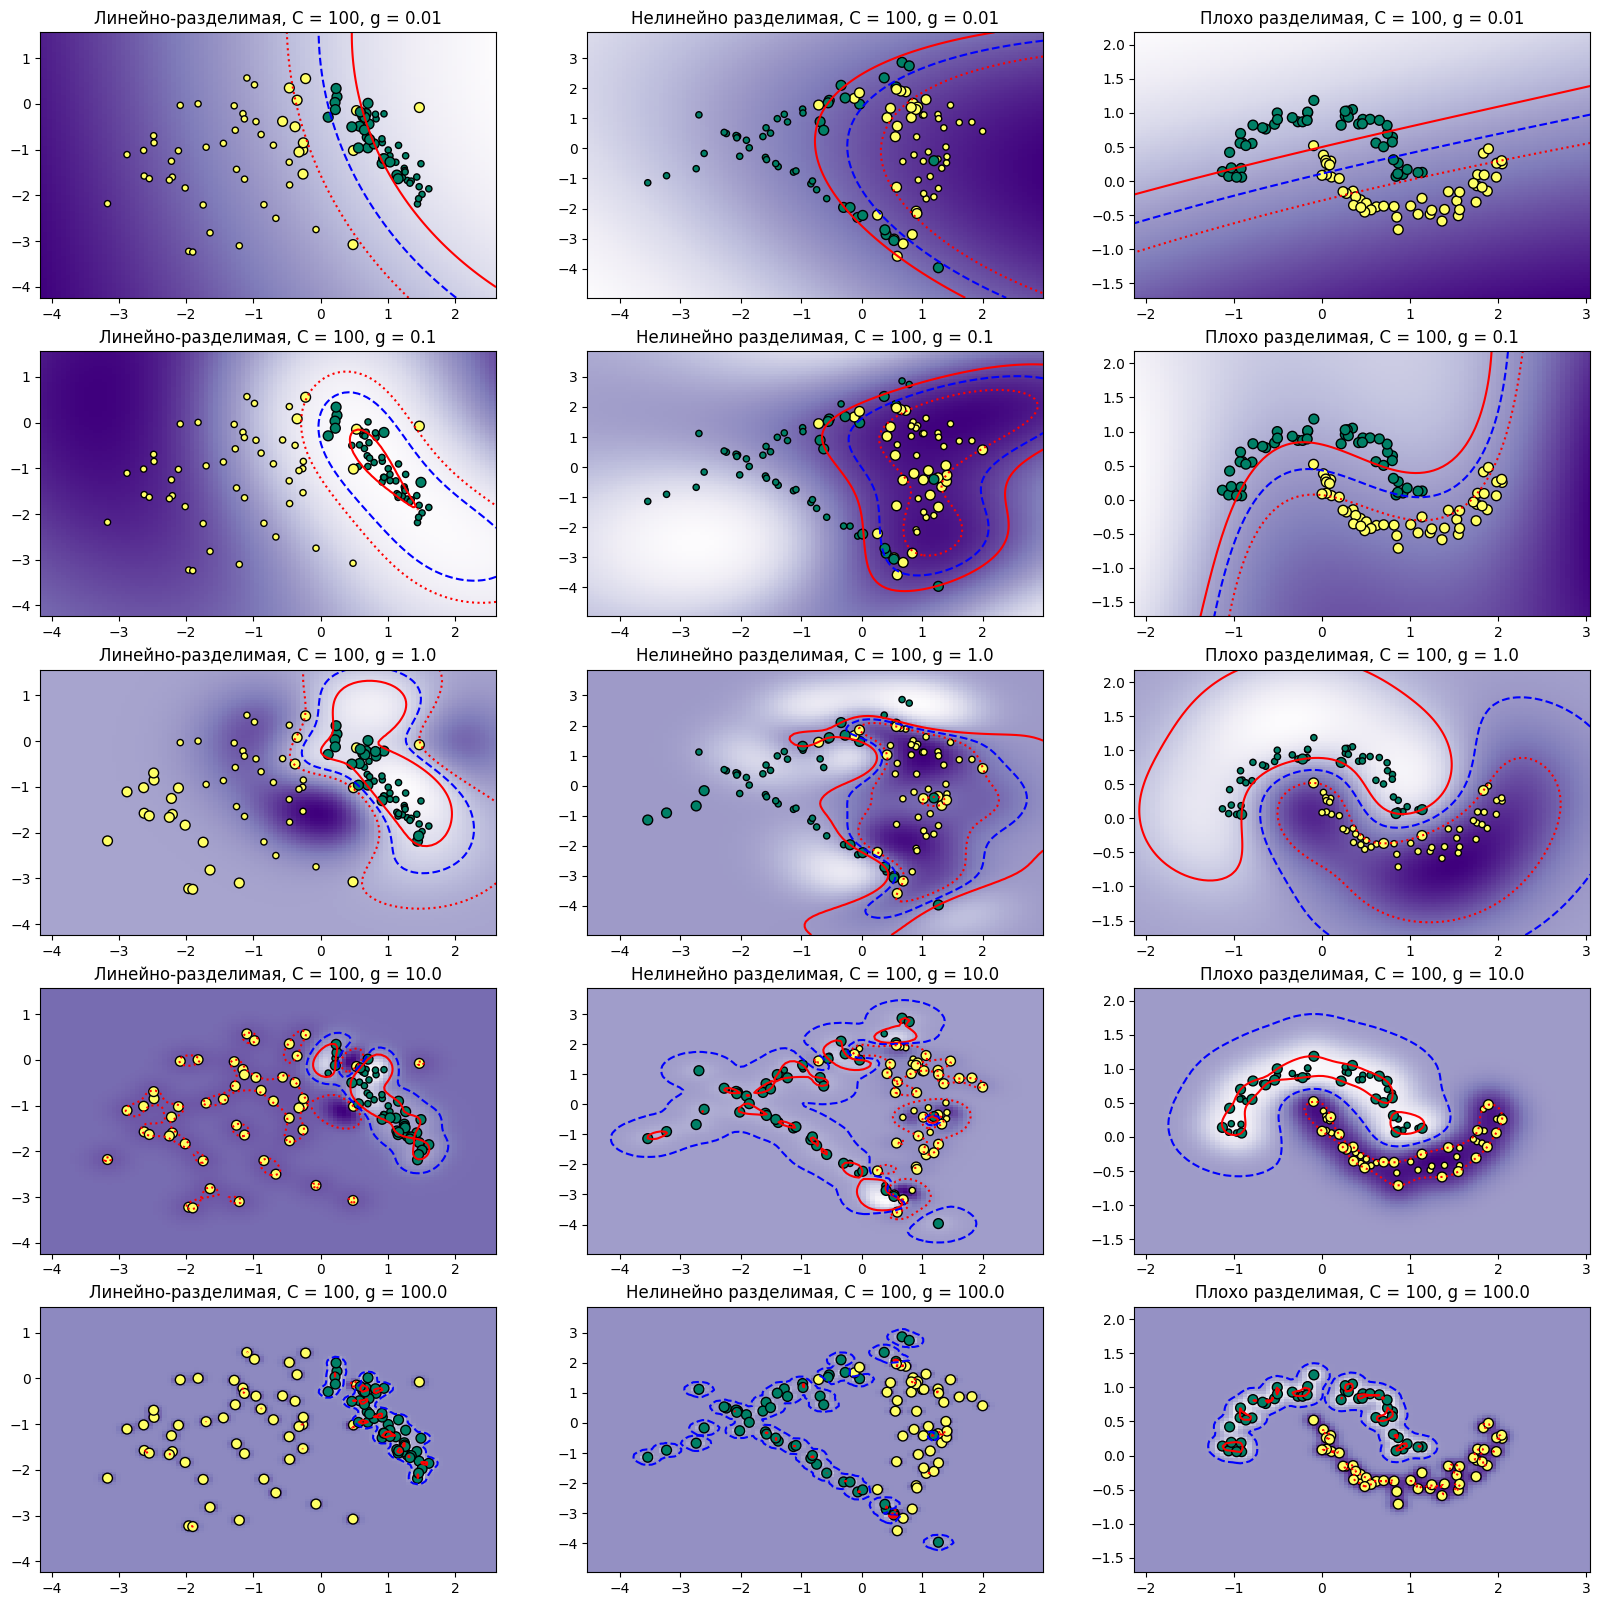

In [21]:
gammas = 10. ** np.arange(-2,3)
cvals, gvals = np.meshgrid(C, gammas)
gg = gvals.flatten()
cc = cvals.flatten()
fig, ax = plt.subplots(len(gg), 3, figsize=(20,20))
for i in range(3):
    for j in range(len(gg)):
        image_DualSVM(X[i], y[i], i, j, cc[j], 'RBF', gamma = gg[j])
        ax[j][i].set_title(titles[i] + ', C = ' + str(cc[j]) + ', g = ' + str(gg[j]))

# Примеры

Настройка вывода графиков [`Maplotlib`](http://matplotlib.org/) и импорт функций из модуля [`pylab`](http://wiki.scipy.org/PyLab).

In [22]:
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ponkr\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['axes', 'solve']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Визуальное решение задачи квадратичного программирования

На следующем рисунке наглядно показано решение задачи QP из задания 1. Оптимизируемая функция $f(\boldsymbol x)$ показана линиями уровня, область значений недопустимых ограничениями окрашена в серый цвет.

C:\Users\ponkr\AppData\Local\Temp\ipykernel_9844\2390794766.py:16: UserWarning: linewidths is ignored by contourf
  contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')


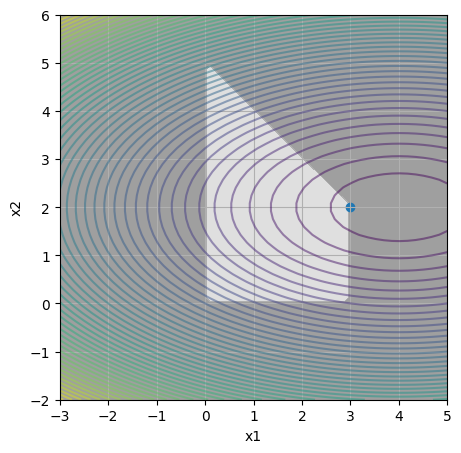

In [23]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [24]:
np.array([True, False, False]) & np.array([True, False, True])

array([ True, False, False])

In [25]:
np.logical_and(np.array([True, False, False]), np.array([True, False, True]))

array([ True, False, False])

## Установка и использование `CvxOpt`

Библиотека [`cvxopt`](http://cvxopt.org/) может быть установлена как обычный python-пакет:

In [26]:
#!pip install --upgrade --user cvxopt

Нас будет интересовать функция [`cvxopt.solvers.qp()`](http://cvxopt.org/examples/tutorial/qp.html):

In [27]:
from cvxopt import solvers
?solvers.qp

Signature:
solvers.qp(
    P,
    q,
    G=None,
    h=None,
    A=None,
    b=None,
    solver=None,
    kktsolver=None,
    initvals=None,
    **kwargs,
)
Docstring:
Solves a quadratic program

    minimize    (1/2)*x'*P*x + q'*x
    subject to  G*x <= h
                A*x = b.


Input arguments.

    P is a n x n dense or sparse 'd' matrix with the lower triangular
    part of P stored in the lower triangle.  Must be positive
    semidefinite.

    q is an n x 1 dense 'd' matrix.

    G is an m x n dense or sparse 'd' matrix.

    h is an m x 1 dense 'd' matrix.

    A is a p x n dense or sparse 'd' matrix.

    b is a p x 1 dense 'd' matrix or None.

    solver is None or 'mosek'.

    The default values for G, h, A and b are empty matrices with
    zero rows.


Output arguments (default solver).

    Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
    'primal objective', 'dual objective', 'gap', 'relative gap',
    'primal infeasibility, 'dual infeasibility', 'primal

## Пример работы с cvxopt

In [28]:
from cvxopt import matrix

A = matrix([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], (2,3))
print(A)
print(A.size)

[ 1.00e+00  3.00e+00  5.00e+00]
[ 2.00e+00  4.00e+00  6.00e+00]

(2, 3)


In [29]:
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],
            [0.0,-1.0,-3.0,5.0,4.0]])
print(G, G.size)

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]
 (5, 2)


In [30]:
from cvxopt import solvers
import numpy 

# Define QP parameters (directly)
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
# Define QP parameters (with NumPy)
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')
# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h)
# Extract optimal value and solution
print(sol['x']) # [7.13e-07, 5.00e+00]
print(sol['primal objective']) # 20.0000061731

[ 7.13e-07]
[ 5.00e+00]

20.00000617311241


In [31]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.788553731701755e-06,
 'relative gap': 4.3942774404996174e-07,
 'primal objective': 20.00000617311241,
 'dual objective': 19.99999738455868,
 'primal infeasibility': 8.740420517429097e-17,
 'dual infeasibility': 3.937229820906071e-16,
 'primal slack': 7.131816408857288e-07,
 'dual slack': 1.5069511036049803e-08,
 'iterations': 8}

In [32]:
print(sol['x'])

[ 7.13e-07]
[ 5.00e+00]



Матрицы задач квадратичного программирования как правило разрежены, лучше использовать матричные операции над разреженными матрицами при реализации SVM.
[Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

## Генерация случайной выборки для задачи классификации

В `SciKit-Learn` есть функция генерации случайных выборок для классификации [`sklearn.datasets.make_classification()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Для того чтобы выборки не менялись при перезапуске ноутбука, используйте параметр `random_state`.

In [33]:
from sklearn.datasets import make_classification

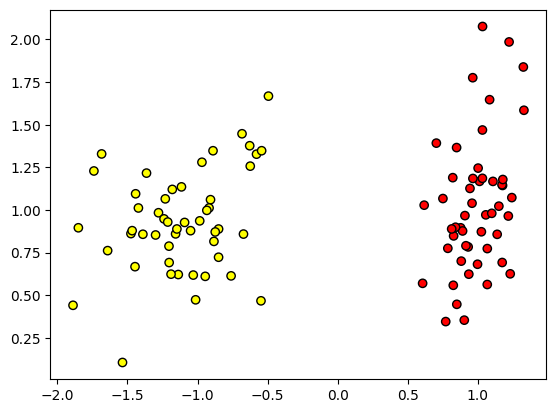

In [34]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

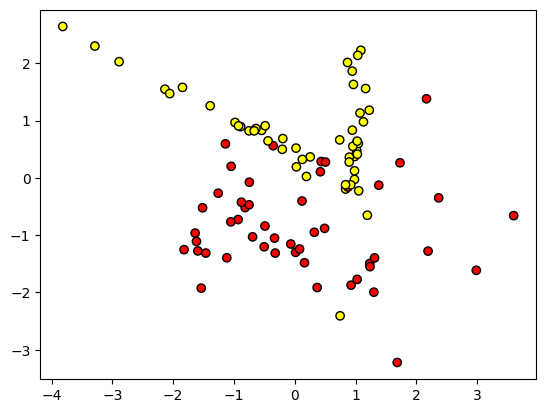

In [35]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=2)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

## Визуализация решающего правила

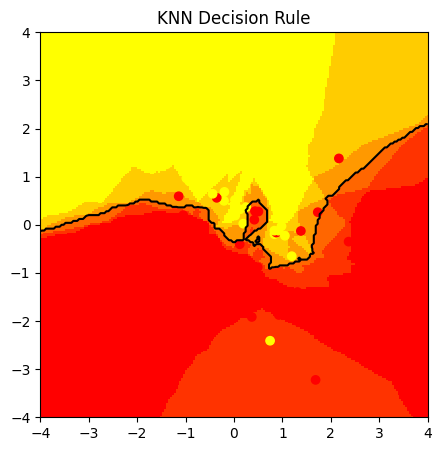

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

figure(figsize=(5, 5))
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

xvals = linspace(-4, 4, 200)
yvals = linspace(-4, 4, 200)

xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1], xx.shape)

# Цветной фон, соответствующий значению решающего правила
pcolormesh(xx, yy, zz, cmap='autumn', zorder=0)

# Линия уровня, соответствующая значению 0.5
contour(xx, yy, zz, levels=(0.5,), colors='k', linewidths=1.5, zorder=1)

xlim([-4, 4])
ylim([-4, 4])
_ = title('KNN Decision Rule')

## Реализация собственной модели для SciKit-Learn

В заданиях 2 и 3 требуется самостоятельно реализовать алгоритм обучения классификатора. Для того чтобы ваш алгоритм можно было использовать различными компонентами библиотеки SciKit-Learn (оценка качества, подбор параметров, композиции и т.д.) нужно всего лишь [реализовать интерфейс `BaseEstimator`](http://scikit-learn.org/stable/developers/#estimators).

In [37]:
from sklearn.base import BaseEstimator

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        self.weights_ = empty(dim)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        return (dot(X, self.weights_) + self.bias_).flatten()
            
    def predict(self, X):
        return sign(self.predict_proba(X))

In [38]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    def __init__(self, C, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        self.dim = X.shape[1]
        self.N = X.shape[0]
        self.alpha_ = empty(self.N)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        pass
            
    def predict(self, X):
        pass